# UWaterloo Admissions 2021 Data Analysis

The purpose of this analysis is to uncover and visualize some trends in this year's
admissions process. This notebook will be split into two sections:

* Data Cleaning Organization
* Data Analysis and Visualizations

#### Disclaimer: Data was pulled from a localized group of UWaterloo applicants and may not represent the full picture.

***

## Data Cleaning

This section of the notebook will cover the methods I used to clean and organize the raw data.
If you are only interested in the analysis/visualizations, please skip this section.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df = pd.read_csv('WaterlooAdmissions2021.csv')

In [4]:
df.head()

,Status,Program,Grade Percentage,Date Accepted,Type,Other
0,Accepted,Accounting and Financial Management,97,Accepted March 5,105,NaN
1,Accepted,Accounting and Financial Management,91,March 5,101,good ecs
2,Accepted,Accounting and Financial Management,96.2,March 7,NaN,NaN
3,Accepted,Accounting and Financial Management,97.7,Mar 7,101,With AIF
4,Accepted,Accounting and Financial Management,97,March 7,101 Applicant and Student Leadership,NaN


In [5]:
len(df)

791

In [6]:
df.columns = ['Status', 'Program', 'Grade', 'Date',
              'Type', 'Other Info']

#### Note to Readers:
Unfortunately, the data for grades is quite messy as users inputted their marks in many formats.
I use the following strategies to try to save as much data as possible.

* Converting all strings to floats
* Taking the middle of a range of grades(if given)
* Ignoring symbols such as '~' and '+', as the original number is typically a good representation of the approximate mark
 (e.g. "a grade of ~90", "a grade of 95+")

Unfortunately, all other data is dropped as they are too difficult to interpret accurately.
These include grades given in formats including but not limited to:
* GPA Scale
* IB Scale
* A-Levels Scale


In [7]:
def calculate_grade(string):
    extract = re.findall(r'\d+(?:\.\d+)?', string)
    nums = []
    for i in extract:
        if 75 <= float(i) <= 100:
            nums.append(float(i))
    if len(nums)<1:
        print("DROP")
    if len(nums) == 1:
        return nums[0]
    if len(nums) > 1:
        return round(sum(nums)/len(nums), 2)

In [8]:
df['Grade'] = df['Grade'].apply(calculate_grade)

DROP
DROP
DROP
DROP
DROP
DROP
DROP
DROP
DROP
DROP
DROP
DROP
DROP
DROP
DROP
DROP
DROP
DROP
DROP
DROP


In [9]:
df['Program'] = df['Program'].apply(lambda string: string.upper())
df['Grade'] = pd.to_numeric(df['Grade'])

In [10]:
df = df[df['Status'].notna() & df['Program'].notna() & df['Grade'].notna()]

In [11]:
df['Program'].unique()

array(['ACCOUNTING AND FINANCIAL MANAGEMENT', 'ACTURIAL SCIENCE', 'AFM',
       'ARBUS (HONOURS ECON) COOP', 'ARCHITECTURAL ENGINEERING',
       'ARTS AND BUSINESS', 'ARTS AND SCIENCE(105)', 'ARTS PSYCHOLOGY',
       'BIOMEDICAL ENGINEERING', 'BIOTECH/CPA',
       'BM AT WATERLOO AND BBA AT LAURIER', 'BMATH/BBA, FARM, HON. MATH',
       'BME', 'COMPUTER ENGINEERING',
       'COMPUTER SCIENCE AND FINANCIAL MANAGEMENT',
       'CHEMICAL AND PHYSICAL SCIENCES: PHYSICS AND ASTRONOMY',
       'CHEMICAL ENGINEERING', 'CIVIL ENGINEERING', 'COMPUTER SCIENCE',
       'COMPUTER SCIENCE/BBA', 'COMPUTING AND FINANCIAL MANAGEMENT',
       'CONPUTER ENGINEERING', 'CS/BBA', 'ELECTRICAL ENGINEERING',
       'ENVIRONMENTAL ENGINEERING',
       'ENVIRONMENTAL SCIENCE - GEOSCIENCE, ENVIRONMENT AND BUSINESS, PLANNING (HONOURS AND CO-OP)',
       'FARM', 'GEOGRAPHY AND AVIATION', 'GEOMATICS',
       'GEOMATICS (CO-OP AND REGULAR)',
       'GLOBAL BUSINESS AND DIGITAL ARTS', 'HEALTH STUDIES',
       'HONOUR

#### Note to Readers:

To simplify, I grouped some programs into one group called "other" due to the low number of applicants.
Three methods to group user inputted program data were chosen as none of them could fully fix all the messy data.

In [12]:
# Method #1

programCodes = ['MATH', 'MATH/BBA', 'ArchEng', 'TRON', 'GEOMATICS', 'SE']
def combine_similar(string):
    if ("MATH" in string or "ACTURIAL" in string) and "BBA" not in string:
        return 'MATH'
    elif "MATH" in string and "BBA" in string:
        return 'MATH/BBA'
    elif "ARCHITECTURAL ENGINEERING" in string:
        return 'ArchEng'
    elif "MECHATRONICS" in string:
        return 'TRON'
    elif "GEOMATICS" in string:
        return  'GEOMATICS'
    elif 'SOFTWARE ENGINEERING' in string:
        return 'SE'
    else:
        return string


In [13]:
df['Program'] = df['Program'].apply(combine_similar)

In [14]:
# Method #2

programAcronyms = {'ACCOUNTING AND FINANCIAL MANAGEMENT':'AFM', 'BIOMEDICAL ENGINEERING':'BME',
                   'COMPUTER ENGINEERING':'CE','CHEMICAL ENGINEERING':'ChemEng',
                   'CIVIL ENGINEERING':'CivEng', 'COMPUTER SCIENCE AND FINANCIAL MANAGEMENT':'CFM',
                   'COMPUTER SCIENCE':'CS', 'COMPUTER SCIENCE/BBA':'CS/BBA',
                   'COMPUTING AND FINANCIAL MANAGEMENT':'CFM', 'CONPUTER ENGINEERING':'CE',
                   'ELECTRICAL ENGINEERING':'ECE', 'ENVIRONMENTAL ENGINEERING':'EnvEng',
                   'MANAGEMENT ENGINEERING':'MGMT', 'MECHANICAL ENGINEERING':'MECH',
                   'NANOTECHNOLOGY ENGINEERING':'NANO', 'SYSTEMS DESIGN ENGINEERING':'SYDE',
                   'CSBBA':'CS/BBA'}

df['Program'].replace(programAcronyms, inplace=True)

In [15]:
# Method 3

def finalReplacement(string):
    if string not in programAcronyms.values() and string not in programCodes:
        return 'OTHER'
    else:
        return string


In [16]:
df['Program'] = df['Program'].apply(finalReplacement)

In [17]:
df['Program'].value_counts()

CS           147
MATH          84
SE            83
CE            82
OTHER         62
TRON          45
CS/BBA        36
CFM           30
SYDE          28
AFM           25
GEOMATICS     24
MECH          23
BME           21
ECE           18
MATH/BBA      13
ArchEng       13
MGMT          10
CivEng        10
EnvEng         6
ChemEng        6
NANO           5
Name: Program, dtype: int64

In [18]:
df['Status'].value_counts()

Accepted    664
Rejected     60
Deferred     47
Name: Status, dtype: int64

In [19]:
df['Grade'].describe()

count    771.000000
mean      96.003346
std        2.479360
min       84.300000
25%       94.915000
50%       96.500000
75%       97.830000
max      100.000000
Name: Grade, dtype: float64

In [20]:
df['Status'].isnull().value_counts()

False    771
Name: Status, dtype: int64

In [21]:
df['Grade'].isnull().value_counts()

False    771
Name: Grade, dtype: int64

In [22]:
df['Program'].isnull().value_counts()

False    771
Name: Program, dtype: int64

#### Data is finally clean! We were able to save 98% of the data!

***

## Data Analysis and Visualizations

In [23]:
df.sort_values('Program')

,Status,Program,Grade,Date,Type,Other Info
0,Accepted,AFM,97.0,Accepted March 5,105,NaN
787,Accepted,AFM,94.0,May 17th 2021,101,NaN
25,Accepted,AFM,85.0,2021-04-06,101,LOL HOW
785,Accepted,AFM,97.0,idk,101,not going
23,Accepted,AFM,92.8,May 7,101,sus
...,...,...,...,...,...,...
551,Accepted,TRON,99.0,March 29,101,NaN
550,Rejected,TRON,94.5,"May 13, 2021",101,"Decent AIF, FIRST 2nd in Nationals"
549,Rejected,TRON,96.4,May 13/21,101,f
556,Accepted,TRON,98.0,March 29,101 app,NaN


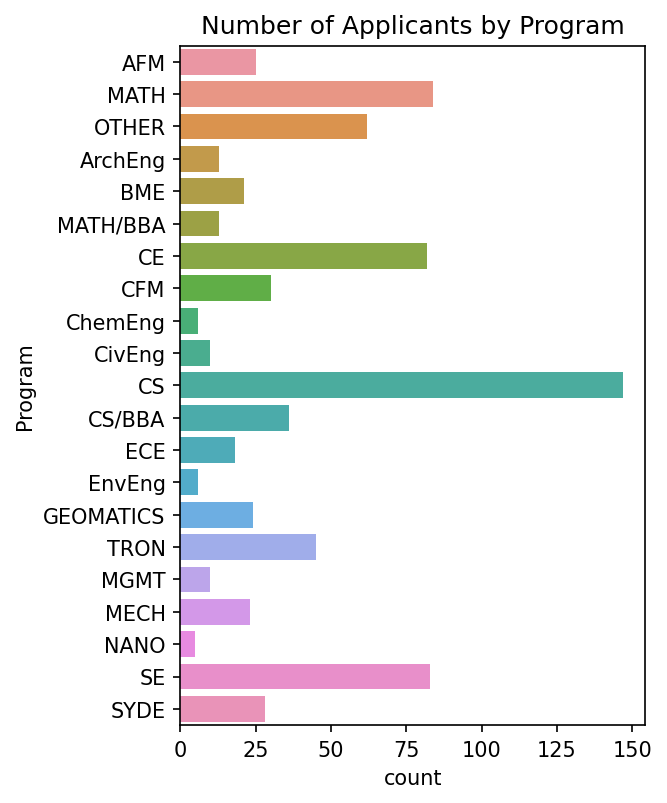

In [39]:
plt.figure(figsize=(4, 6), dpi=150)
plt.title('Number of Applicants by Program')
sns.countplot(data=df, y='Program')
plt.savefig('../CanadianUniAdmissionsData2021/images/Number_Of_Applicants.png')

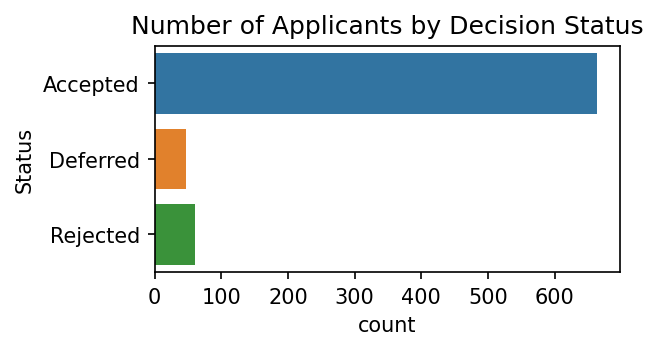

In [41]:
plt.figure(figsize=(4, 2), dpi=150)
plt.title('Number of Applicants by Decision Status')
sns.countplot(data=df, y='Status')
plt.savefig('../CanadianUniAdmissionsData2021/images/Applicants_by_Decision_Status.png')

#### Observation: Most data comes from accepted applicants.

***

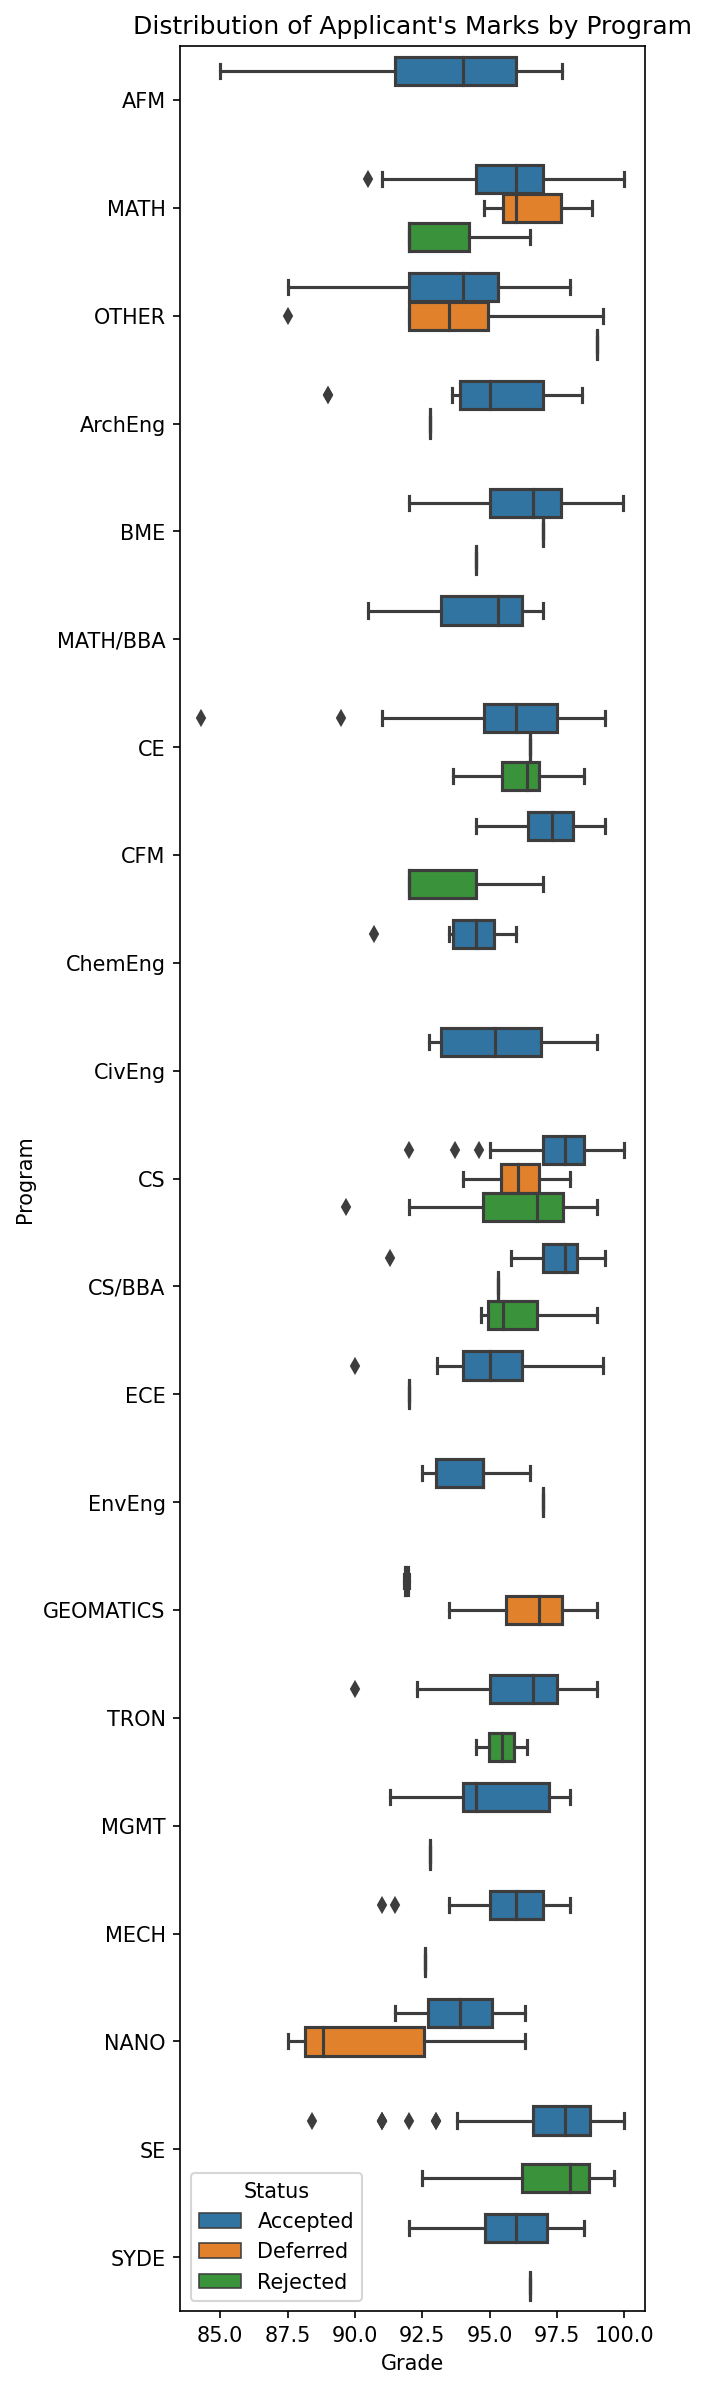

In [25]:
plt.figure(figsize=(4, 20), dpi=150)
plt.title('Distribution of Applicant\'s Marks by Program')
sns.boxplot(y='Program', x='Grade', data=df, hue='Status')
plt.savefig('../CanadianUniAdmissionsData2021/images/Mark_Distribution_by_Program.png')

In [26]:
df.describe(include='all')

,Status,Program,Grade,Date,Type,Other Info
count,771,771,771.000000,771,715,310
unique,3,21,NaN,202,45,256
top,Accepted,CS,NaN,March 29,101,Deferred from CS
freq,664,147,NaN,109,520,12
mean,NaN,NaN,96.003346,NaN,NaN,NaN
std,NaN,NaN,2.479360,NaN,NaN,NaN
min,NaN,NaN,84.300000,NaN,NaN,NaN
25%,NaN,NaN,94.915000,NaN,NaN,NaN
50%,NaN,NaN,96.500000,NaN,NaN,NaN
75%,NaN,NaN,97.830000,NaN,NaN,NaN


<Figure size 400x400 with 0 Axes>

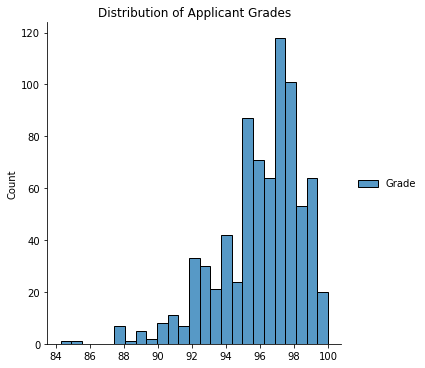

In [27]:
plt.figure(figsize=(4, 4), dpi=100)
sns.displot(data=df)
plt.title('Distribution of Applicant Grades')
plt.savefig('../CanadianUniAdmissionsData2021/images/Mark_Distribution')

In [28]:
df[df['Status'] == 'Accepted'].mean()

Grade    96.017681
dtype: float64

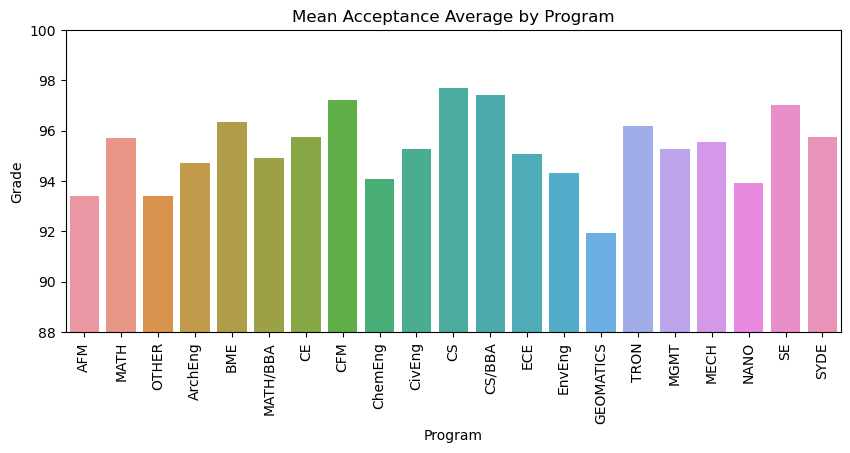

In [29]:
plt.figure(figsize=(10, 4), dpi=100)
plt.xticks(rotation=90)
plt.ylim(88, 100)
plt.title('Mean Acceptance Average by Program')
sns.barplot(data=df[df['Status'] == 'Accepted'], y='Grade', x='Program', ci=None)
plt.savefig('../CanadianUniAdmissionsData2021/images/mean_acceptance_avg.png')

***

In [30]:
std_df = df[df['Status'] == 'Accepted'].groupby('Program').std().reset_index()
std_df.columns = ['Program', 'Standard Deviation']

In [31]:
std_df

,Program,Standard Deviation
0,AFM,3.256453
1,ArchEng,3.096072
2,BME,2.186228
3,CE,2.489520
4,CFM,1.274961
5,CS,1.242808
6,CS/BBA,1.479851
7,ChemEng,1.873677
8,CivEng,2.158710
9,ECE,2.139793


In [48]:
std_df.sort_values('Standard Deviation', ascending=False)

,Program,Standard Deviation
16,NANO,3.394113
0,AFM,3.256453
1,ArchEng,3.096072
17,OTHER,2.582867
18,SE,2.563124
3,CE,2.489520
15,MGMT,2.258748
2,BME,2.186228
8,CivEng,2.158710
9,ECE,2.139793


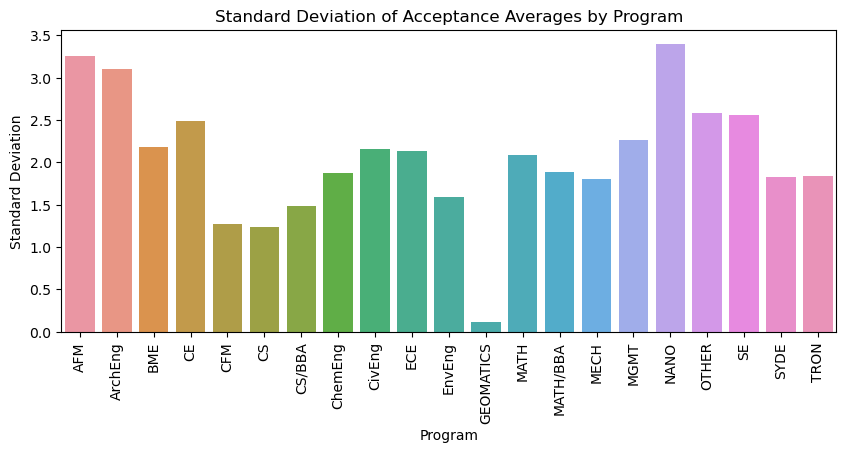

In [49]:
plt.figure(figsize=(10, 4), dpi=100)
plt.xticks(rotation=90)
plt.title('Standard Deviation of Acceptance Averages by Program')
sns.barplot(data=std_df, x='Program', y='Standard Deviation')
plt.savefig('../CanadianUniAdmissionsData2021/images/std_dev_acceptances.png')

**Question:** Why does Geomatics have such a low standard deviation?

In [34]:
df[df['Program'] == 'GEOMATICS']['Status'].value_counts()

Deferred    22
Accepted     2
Name: Status, dtype: int64

**Answer:** Of the 24 Geomatics decisions recorded only 2 accepted. All other applicants had
likely been deferred from another program like CS.

***

**Question:** Do programs with more applicants have higher entrance averages?

In [56]:
app_df = pd.DataFrame(df[df['Status'] == 'Accepted']['Program'].value_counts()).reset_index()
app_df.columns =['Program', 'Applicants']

In [59]:
app_df.head()

,Program,Applicants
0,CS,129
1,MATH,75
2,CE,71
3,SE,62
4,OTHER,57


In [60]:
mean_df = df[df['Status'] == 'Accepted'].groupby('Program').mean().reset_index()
mean_df.columns = ['Program', 'Mean Avg']

In [62]:
mean_df.head()

,Program,Mean Avg
0,AFM,93.386000
1,ArchEng,94.695833
2,BME,96.334737
3,CE,95.758028
4,CFM,97.194444


In [63]:
corr_df = pd.merge(app_df, mean_df, how='inner', on='Program')

In [65]:
corr_df.head()

,Program,Applicants,Mean Avg
0,CS,129,97.687752
1,MATH,75,95.714000
2,CE,71,95.758028
3,SE,62,97.032097
4,OTHER,57,93.409649


<AxesSubplot:xlabel='Applicants', ylabel='Mean Avg'>

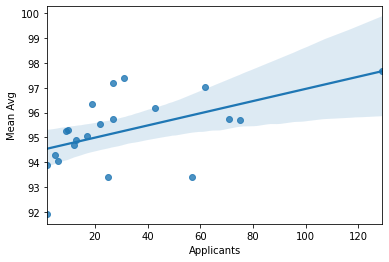

In [74]:
sns.regplot(data=corr_df, x='Applicants', y='Mean Avg')

In [75]:
corr_df.corr()

,Applicants,Mean Avg
Applicants,1.000000,0.530717
Mean Avg,0.530717,1.000000


**Answer:** There appears to be a relatively strong correlation between number of applicants and mean avg, showing that 
competitive programs tend to have higher entrance averages.

***

### Interesting conclusions:

Of the 771 applicants in the dataset:

* CS is the most popular program with 147 of 771 applicants
* The mean acceptance average is 96.0
* Most applicant decisions were made on March 29th
* NANO, AFM and ArchEng had the highest standard deviation of acceptance averages
* There is a correlation between number of applicants and entrance average

***

### Important considerations:

* 771 applicants represents a small pool of the total number of applicants to UWaterloo
* Many programs did not have much data in the dataset and was grouped into "OTHER"
* Most data collected falls under the "accepted" category, as deferred/rejected applicants are less likely to share their data